# Facebook Prophet Tutorial 

Source: 
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
- https://arnesund.com/2017/02/26/using-facebook-prophet-forecasting-library-to-predict-the-weather/
- https://facebookincubator.github.io/prophet/docs/quick_start.html


In [ ]:
### 

In [ ]:
# download packages  
! pip install cython
! pip install pystan
! pip install fbprophet

In [1]:
# import packages 
import pandas as pd
import numpy as np 
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# import data 
data = pd.read_csv('example_wp_peyton_manning.csv')
print (data.head())

print ('\n Data Types:')
print (data.dtypes)

           ds      y
0  2007-12-10  14629
1  2007-12-11   5012
2  2007-12-12   3582
3  2007-12-13   3205
4  2007-12-14   2680

 Data Types:
ds    object
y      int64
dtype: object


In [2]:
# convert ds to datetime object
data['ds'] = pd.to_datetime(data['ds'])
# log transform y 
data['y'] = np.log(data['y'])

data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

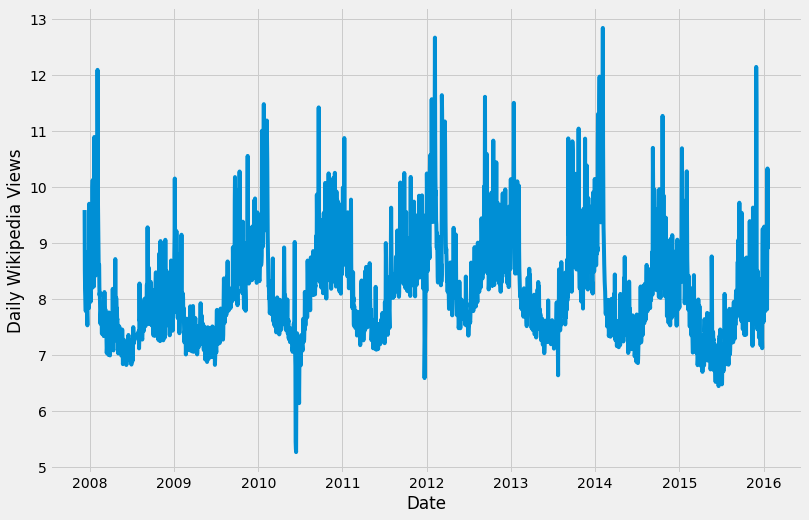

In [5]:
# plot 
plt.figure(figsize=(12,8))
plt.plot(data.ds,data.y)
plt.xlabel("Date")
plt.ylabel("Daily Wikipedia Views")
plt.show()

In [6]:
# initialize Prophet object    
m = Prophet()
# fit the data 
m.fit(data)

In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


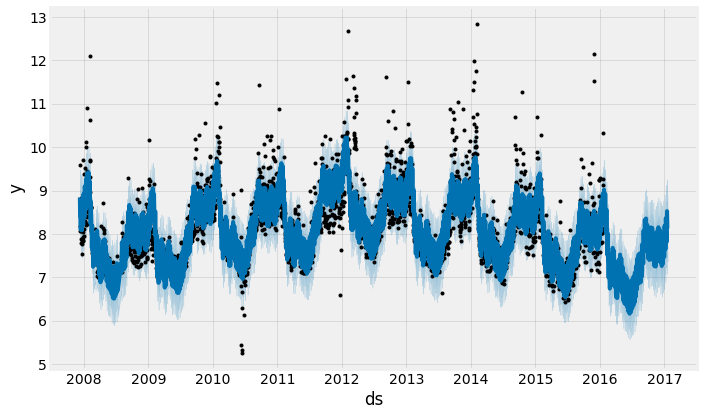

In [14]:
forecast = m.predict(future)
m.plot(forecast)

In [ ]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [11]:
forecast.columns

Index(['ds', 't', 'trend', 'seasonal_lower', 'seasonal_upper', 'trend_lower',
       'trend_upper', 'yhat_lower', 'yhat_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'seasonal',
       'yhat'],
      dtype='object')

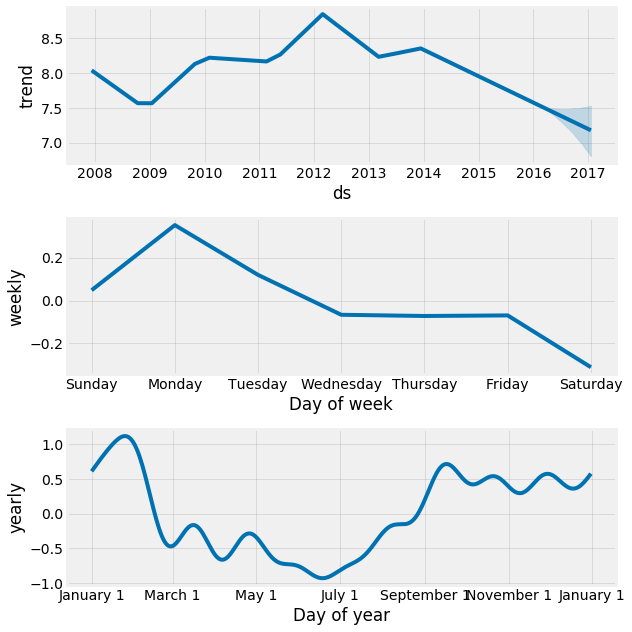

In [16]:
m.plot_components(forecast)

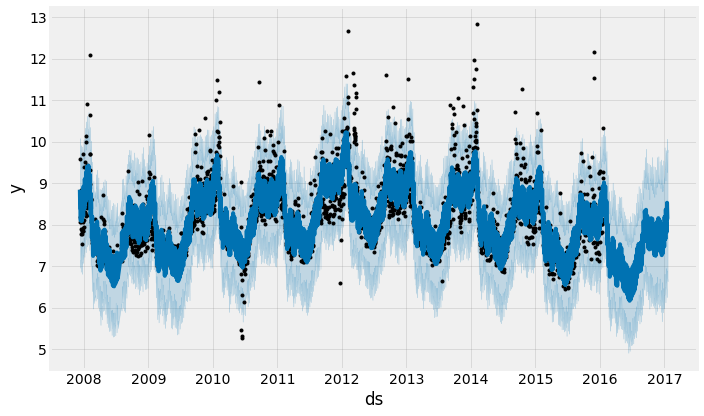

In [17]:
# change uncertainy interval 
m = Prophet(interval_width=.99)

m.fit(data)
future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
m.plot(forecast)

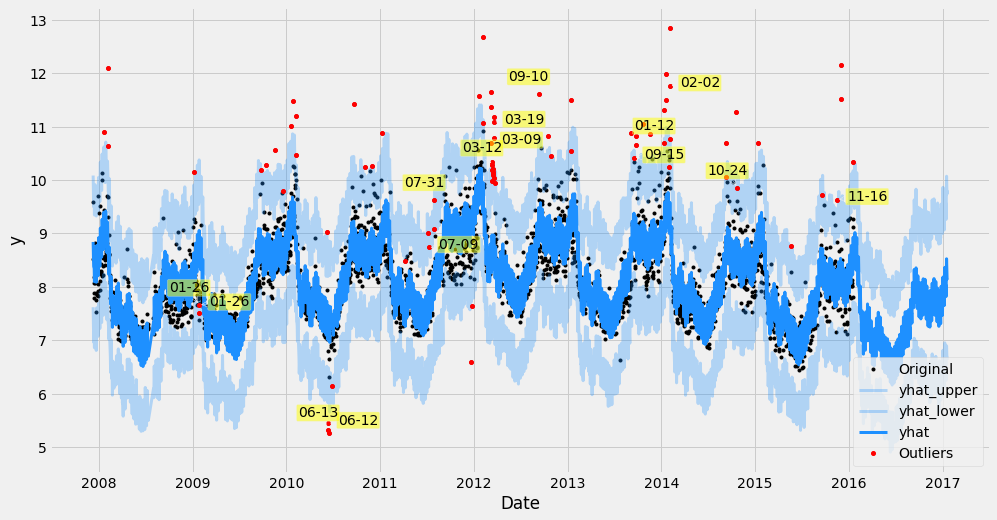

In [26]:

# extract columns from forecast df 
forecast_sub = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# join data and forecast_sub 
joined = pd.merge(forecast_sub, data, how='left', on=None, left_on='ds', right_on='ds',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
# outliers
outliers = joined[joined.apply(lambda x: x.y > x.yhat_upper or x.y < x.yhat_lower ,axis=1)]


plt.close()

plt.figure(figsize=(15,8))

# original data 
plt.plot_date(data.ds,data.y,label = 'Original',color='black',markersize=3)#,color='black'

## uncertainty bounds 
# upper 
plt.plot(joined.ds,joined.yhat_upper,label = 'yhat_upper',ls='solid',alpha=0.3,color='dodgerblue',lw=3)
# lower 
plt.plot(joined.ds,joined.yhat_lower,label = 'yhat_lower',ls='solid',alpha=0.3,color='dodgerblue',lw=3)

# forecast 
plt.plot(joined.ds,joined.yhat,label = 'yhat',ls='solid',color='dodgerblue',lw=3)

# outliers 

plt.plot_date(outliers.ds,outliers.y,label = 'Outliers',color='red',markersize=4)#,color='black'

counter = 0 
for label, x, y in zip(outliers.ds, outliers.ds, outliers.y):
    if counter%10 == 5: 
        plt.annotate(
            str(label)[5:10],
            xy=(x, y), xytext=(10, 10),
            textcoords='offset points', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    if counter%11 == 5:
        plt.annotate(
            str(label)[5:10],
            xy=(x, y), xytext=(10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
    counter+=1

plt.ylabel("y")
plt.xlabel("Date")

plt.legend(loc = 'lower right')

plt.show()

In [ ]:
### Airline Passenger data

In [ ]:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

In [8]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

In [11]:
df = pd.read_csv('AirPassengers.csv')
df.columns = ('Month','AirPassengers')
print(df.head(5)) 
print(df.dtypes)


     Month  AirPassengers
0  1949-01            112
1  1949-02            118
2  1949-03            132
3  1949-04            129
4  1949-05            121
Month            object
AirPassengers     int64
dtype: object


In [16]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [18]:
# Prophet imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), so let's rename the columns in our DataFrame:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


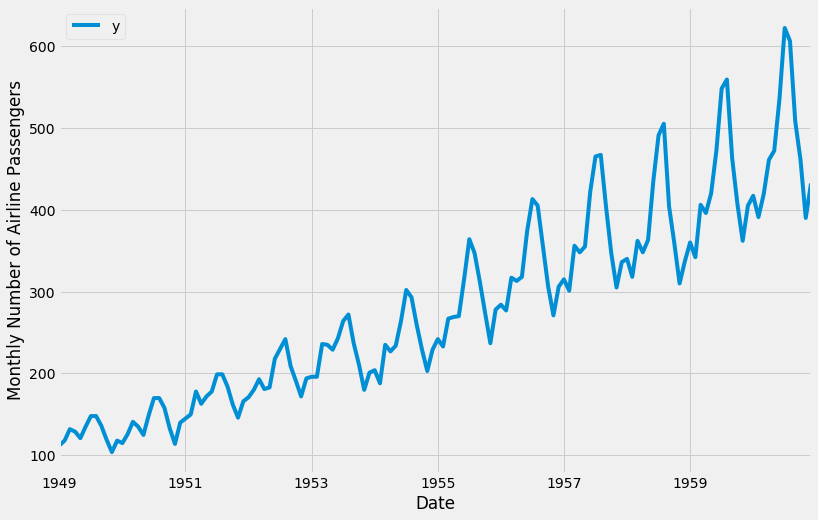

In [19]:
# plot 
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

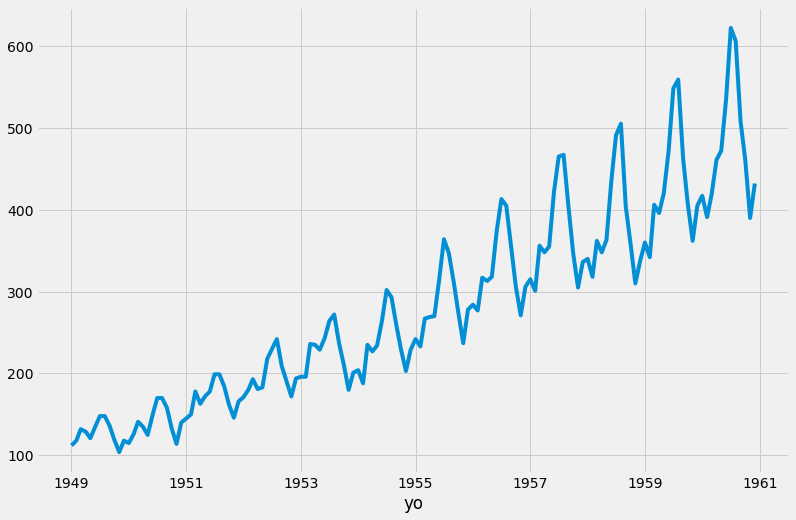

In [28]:
# same as above 
plt.figure(figsize=(12,8))
plt.plot(df.ds,df.y)
plt.xlabel("yo")
plt.show()

In [ ]:
## Time Series Forecasting with Prophet

In [29]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [30]:
my_model.fit(df)


Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [31]:
# instruct Prophet to generate 36 datestamps in the future.
# we are created the timestamps for the next 36 month period 

future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

# MS = Month Start 
# we must specify 
# predict 3 years or 36 months 

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [33]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# ds: the datestamp of the forecasted value
# yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
# yhat_lower: the lower bound of our forecasts
# yhat_upper: the upper bound of our forecasts

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.775490,608.119726,691.275636
176,1963-09-01,602.482320,558.543056,645.900410
177,1963-10-01,566.300585,521.231816,610.771497
178,1963-11-01,534.434779,490.292968,580.902636
179,1963-12-01,564.016269,522.319476,608.082683


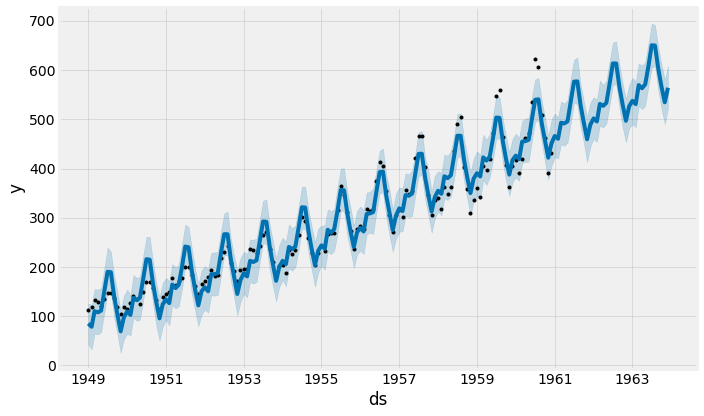

In [34]:
my_model.plot(forecast,
              uncertainty=True)

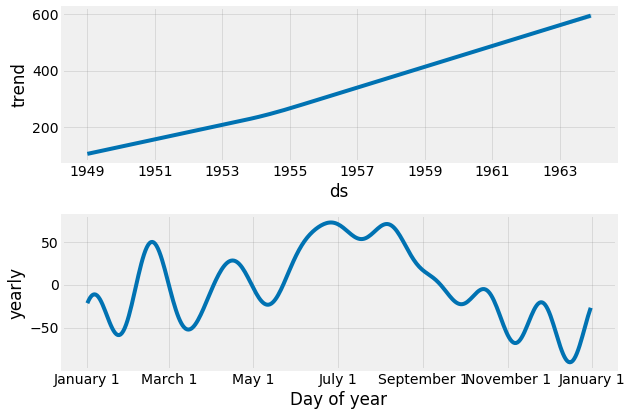

In [36]:
my_model.plot_components(forecast)